In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.colors as cl
from matplotlib.colorbar import Colorbar
import seaborn as sns
import pandas as pd
import numpy as np
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
def corner(rotators, nonrotators, features=10, title=''):

    %matplotlib notebook
    
    shorthand = [f'f{i}' for i in range(features)]
    mosaic = np.zeros((features,features), dtype='U12')
    for i in range(features):
        for j in range(features):
            if i > j:
                mosaic[i,j] = f'{shorthand[j]}x{shorthand[i]}y'
            elif i == j:
                mosaic[i,j] = shorthand[i]
            else:
                mosaic[i,j] = '.'

    fig = plt.figure(figsize=(15,15), constrained_layout=True).subplot_mosaic(mosaic)

    for i in range(features):
        for j in range(features):
            if i > j:
                try:
                    sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], x=nonrotators[:,j],
                                y=nonrotators[:,i],
    #                             fill=True, alpha=0.9,
                                color='#380057', log_scale=False)
                    sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], x=rotators[:,j],
                                y=rotators[:,i],
    #                             fill=True, alpha=0.7, 
                                color='#ffea00', log_scale=False)
                except:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].scatter(nonrotators[:,j],
                                nonrotators[:,i],
                                s=2, color='#380057', alpha=0.9)
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].scatter(rotators[:,j],
                                rotators[:,i],
                                s=2, color='#ffea00', alpha=0.7)
    #                 fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xscale('log')
    #                 fig[f'{shorthand[j]}x{shorthand[i]}y'].set_yscale('log')
                if i == 9:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(corner_feature_names[j], rotation=10)
                else:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(None)
                if j == 0:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(corner_feature_names[i], rotation=80)
                else:
                    fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(None)
            elif i == j:
                fig[f'{shorthand[j]}'].hist(nonrotators[:,j], log=False, density=False, color='#380057')#, bins=bins
                fig[f'{shorthand[j]}'].hist(rotators[:,j], log=False, density=False, color='#ffea00', alpha=0.5)
    #             fig[f'{shorthand[j]}'].set_xscale('log')
                if i == 9:
                    fig[f'{shorthand[i]}'].set_xlabel(corner_feature_names[i], rotation=10)
                if i == 0:
                    fig[f'{shorthand[i]}'].set_ylabel(corner_feature_names[i], rotation=80)

    # ax.hist(residuals_yeah, bins=np.arange(0,int(np.ceil(max(residuals_yeah))),0.5), log=True, density=True, color='#ffea00')
    # ax.hist(residuals_nope, bins=np.arange(0,int(np.ceil(max(residuals_nope))),0.5), log=True, density=True, color='#380057', alpha=0.5)

    # fig.suptitle('S21 training set', x=0.09, y=0.95)

In [3]:
tess_list = glob.glob('./targetdata/*_kepler.csv')

tess_data = []

for filename in tess_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    tess_data.append(df)
    
tess_data = pd.concat(tess_data, axis=0, ignore_index=True)

In [4]:
kic_t = tess_data['KIC']
p_r_t = tess_data['Santos Period (d)']

ls_tess_a = tess_data['LS Period 1st peak (d)']
ls_tess_b = tess_data['LS Period 2nd peak (d)']
ls_tess_c = tess_data['LS Period 3rd peak (d)']
ls_tess_amp_a = tess_data['LS Period 1st amplitude']
ls_tess_amp_b = tess_data['LS Period 2nd amplitude']
ls_tess_amp_c = tess_data['LS Period 3rd amplitude']
ls_tess_rms_a = tess_data['LS Period 1st RMS']
ls_tess_rms_b = tess_data['LS Period 2nd RMS']
ls_tess_rms_c = tess_data['LS Period 3rd RMS']
ls_tess_mad_a = tess_data['LS Period 1st MAD']
ls_tess_mad_b = tess_data['LS Period 2nd MAD']
ls_tess_mad_c = tess_data['LS Period 3rd MAD']
ls_tess2_a = tess_data['LS 2-term Period 1st peak (d)']
ls_tess2_b = tess_data['LS 2-term Period 2nd peak (d)']
ls_tess2_c = tess_data['LS 2-term Period 3rd peak (d)']
ls_tess2_amp_a = tess_data['LS 2-term Period 1st amplitude']
ls_tess2_amp_b = tess_data['LS 2-term Period 2nd amplitude']
ls_tess2_amp_c = tess_data['LS 2-term Period 3rd amplitude']
ls_tess2_rms_a = tess_data['LS 2-term Period 1st RMS']
ls_tess2_rms_b = tess_data['LS 2-term Period 2nd RMS']
ls_tess2_rms_c = tess_data['LS 2-term Period 3rd RMS']
ls_tess2_mad_a = tess_data['LS 2-term Period 1st MAD']
ls_tess2_mad_b = tess_data['LS 2-term Period 2nd MAD']
ls_tess2_mad_c = tess_data['LS 2-term Period 3rd MAD']
acf_tess_a = tess_data['ACF Period 1st peak (d)']
acf_tess_b = tess_data['ACF Period 2nd peak (d)']
acf_tess_c = tess_data['ACF Period 3rd peak (d)']
acf_tess_amp_a = tess_data['ACF Period 1st amplitude']
acf_tess_amp_b = tess_data['ACF Period 2nd amplitude']
acf_tess_amp_c = tess_data['ACF Period 3rd amplitude']
acf_tess_rms_a = tess_data['ACF Period 1st RMS']
acf_tess_rms_b = tess_data['ACF Period 2nd RMS']
acf_tess_rms_c = tess_data['ACF Period 3rd RMS']
acf_tess_mad_a = tess_data['ACF Period 1st MAD']
acf_tess_mad_b = tess_data['ACF Period 2nd MAD']
acf_tess_mad_c = tess_data['ACF Period 3rd MAD']
ls_med_tess = tess_data['LS median power']
ls2_med_tess = tess_data['LS 2-term median power']
rvar_tess = tess_data['Rvar']
cdpp_tess = tess_data['CDPP']

In [5]:
ts1 = pd.read_csv('S21r_train.csv')
ts2 = pd.read_csv('S21n_train.csv')
training_set = pd.concat([ts1, ts2])
kic_match = training_set['KIC']
kp_match = training_set['Kp']
teff_match = training_set['Teff']
binary_match = training_set['Flag_Binary']
koi_match = training_set['Flag_KOI']
# sph_match = training_set['Sph']

# kic_t_train = kic_match[:np.where(kic_match==max(kic_t))[0][0]+1].reindex(kic_t).index.values
# kp_t = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t.values]
# teff_t = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t.values]
# flag_binary_t = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t.values]
# flag_koi_t = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

In [6]:
period_state = [1 if p > 0 else 0 for p in p_r_t]

In [7]:
# %matplotlib notebook

# fig, ax = plt.subplots(1)
# ax.scatter(p_r_t, ls_tess_a, c=period_state, s=10)
# ax.plot(range(-10,150),range(-10,150),'k-', lw=1)
# ax.set(xlim=(-1, 60), ylim=(-1,30),
#        xlabel='Santos 21 period (d)', ylabel='LS period (d)')

In [8]:
features = np.array([ls_tess_a, ls_tess_b, ls_tess_c,
                    ls_tess_amp_a, ls_tess_amp_b, ls_tess_amp_c,
                    ls_tess_rms_a, ls_tess_rms_b, ls_tess_rms_c,
                    ls_tess_mad_a, ls_tess_mad_b, ls_tess_mad_c,
                    ls_tess2_a, ls_tess2_b, ls_tess2_c,
                    ls_tess2_amp_a, ls_tess2_amp_b, ls_tess2_amp_c,
                    ls_tess2_rms_a, ls_tess2_rms_b, ls_tess2_rms_c,
                    ls_tess2_mad_a, ls_tess2_mad_b, ls_tess2_mad_c,
                    acf_tess_a, acf_tess_b, acf_tess_c,
                    acf_tess_amp_a, acf_tess_amp_b, acf_tess_amp_c,
                    acf_tess_rms_a, acf_tess_rms_b, acf_tess_rms_c,
                    acf_tess_mad_a, acf_tess_mad_b, acf_tess_mad_c,
#                     ls_med_tess, rvar_tess, cdpp_tess])#,
                    ls_med_tess, ls2_med_tess, rvar_tess, cdpp_tess])#,
                    #kp_t, teff_t])#, flag_binary_t, flag_koi_t])
feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                 'LS Period 1st amplitude', 'LS Period 2nd amplitude', 'LS Period 3rd amplitude',
                 'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                 'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                 'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                 'LS 2-term Period 1st amplitude', 'LS 2-term Period 2nd amplitude', 'LS 2-term Period 3rd amplitude',
                 'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                 'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                 'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                 'ACF Period 1st amplitude', 'ACF Period 2nd amplitude', 'ACF Period 3rd amplitude',
                 'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                 'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
#                  'LS median power', 'Rvar', 'CDPP']#,
                 'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [9]:
features[np.isnan(features)] = 0

In [10]:
forest = RandomForestClassifier(random_state=0)
forest.fit(features.T, period_state)

# classifier = svm.LinearSVC()
# classifier.fit(features.T, period_state)

RandomForestClassifier(random_state=0)

In [11]:
# classifier.get_params()

In [12]:
importances = forest.feature_importances_
# importances = np.abs(classifier.coef_[0])

In [13]:
for i, val in enumerate(importances):
    print(f'{feature_names[i]}: {val:.5f}')

LS Period 1st peak (d): 0.01763
LS Period 2nd peak (d): 0.01595
LS Period 3rd peak (d): 0.01724
LS Period 1st amplitude: 0.06537
LS Period 2nd amplitude: 0.04481
LS Period 3rd amplitude: 0.03529
LS Period 1st RMS: 0.01136
LS Period 2nd RMS: 0.01056
LS Period 3rd RMS: 0.00865
LS Period 1st MAD: 0.01112
LS Period 2nd MAD: 0.00832
LS Period 3rd MAD: 0.00793
LS 2-term Period 1st peak (d): 0.01736
LS 2-term Period 2nd peak (d): 0.01732
LS 2-term Period 3rd peak (d): 0.01672
LS 2-term Period 1st amplitude: 0.09365
LS 2-term Period 2nd amplitude: 0.11790
LS 2-term Period 3rd amplitude: 0.03651
LS 2-term Period 1st RMS: 0.01989
LS 2-term Period 2nd RMS: 0.01102
LS 2-term Period 3rd RMS: 0.01392
LS 2-term Period 1st MAD: 0.01096
LS 2-term Period 2nd MAD: 0.00818
LS 2-term Period 3rd MAD: 0.00841
ACF Period 1st peak (d): 0.01192
ACF Period 2nd peak (d): 0.01216
ACF Period 3rd peak (d): 0.01224
ACF Period 1st amplitude: 0.03695
ACF Period 2nd amplitude: 0.04398
ACF Period 3rd amplitude: 0.03508
A

## Testing

In [14]:
test_list = glob.glob('./testsetdata/*_kepler.csv')

test_data = []

for filename in test_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    test_data.append(df)
    
test_data = pd.concat(test_data, axis=0, ignore_index=True)

In [15]:
kic_t_test = test_data['KIC']
p_r_t_test = test_data['Santos Period (d)']

ls_tess_a_test = test_data['LS Period 1st peak (d)']
ls_tess_b_test = test_data['LS Period 2nd peak (d)']
ls_tess_c_test = test_data['LS Period 3rd peak (d)']
ls_tess_amp_a_test = test_data['LS Period 1st amplitude']
ls_tess_amp_b_test = test_data['LS Period 2nd amplitude']
ls_tess_amp_c_test = test_data['LS Period 3rd amplitude']
ls_tess_rms_a_test = test_data['LS Period 1st RMS']
ls_tess_rms_b_test = test_data['LS Period 2nd RMS']
ls_tess_rms_c_test = test_data['LS Period 3rd RMS']
ls_tess_mad_a_test = test_data['LS Period 1st MAD']
ls_tess_mad_b_test = test_data['LS Period 2nd MAD']
ls_tess_mad_c_test = test_data['LS Period 3rd MAD']
ls_tess2_a_test = test_data['LS 2-term Period 1st peak (d)']
ls_tess2_b_test = test_data['LS 2-term Period 2nd peak (d)']
ls_tess2_c_test = test_data['LS 2-term Period 3rd peak (d)']
ls_tess2_amp_a_test = test_data['LS 2-term Period 1st amplitude']
ls_tess2_amp_b_test = test_data['LS 2-term Period 2nd amplitude']
ls_tess2_amp_c_test = test_data['LS 2-term Period 3rd amplitude']
ls_tess2_rms_a_test = test_data['LS 2-term Period 1st RMS']
ls_tess2_rms_b_test = test_data['LS 2-term Period 2nd RMS']
ls_tess2_rms_c_test = test_data['LS 2-term Period 3rd RMS']
ls_tess2_mad_a_test = test_data['LS 2-term Period 1st MAD']
ls_tess2_mad_b_test = test_data['LS 2-term Period 2nd MAD']
ls_tess2_mad_c_test = test_data['LS 2-term Period 3rd MAD']
acf_tess_a_test = test_data['ACF Period 1st peak (d)']
acf_tess_b_test = test_data['ACF Period 2nd peak (d)']
acf_tess_c_test = test_data['ACF Period 3rd peak (d)']
acf_tess_amp_a_test = test_data['ACF Period 1st amplitude']
acf_tess_amp_b_test = test_data['ACF Period 2nd amplitude']
acf_tess_amp_c_test = test_data['ACF Period 3rd amplitude']
acf_tess_rms_a_test = test_data['ACF Period 1st RMS']
acf_tess_rms_b_test = test_data['ACF Period 2nd RMS']
acf_tess_rms_c_test = test_data['ACF Period 3rd RMS']
acf_tess_mad_a_test = test_data['ACF Period 1st MAD']
acf_tess_mad_b_test = test_data['ACF Period 2nd MAD']
acf_tess_mad_c_test = test_data['ACF Period 3rd MAD']
ls_med_tess_test = test_data['LS median power']
ls2_med_tess_test = test_data['LS 2-term median power']
rvar_tess_test = test_data['Rvar']
cdpp_tess_test = test_data['CDPP']

In [16]:
tst1 = pd.read_csv('S21r_test.csv')
tst2 = pd.read_csv('S21n_test.csv')
testing_set2 = pd.concat([tst1, tst2])
testing_set2 = testing_set2[~testing_set2.index.duplicated()]
kic_match2 = testing_set2['KIC']
kp_match2 = testing_set2['Kp']
teff_match2 = testing_set2['Teff']
binary_match2 = testing_set2['Flag_Binary']
koi_match2 = testing_set2['Flag_KOI']
# sph_match = training_set['Sph']

In [17]:
# kic_t_temp = kic_match2[:np.where(kic_match2==max(kic_t_test))[0][0]+1].reindex(kic_t_test).index.values
# kp_t_test = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t_test.values]
# teff_t_test = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t_test.values]
# flag_binary_t_test = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t_test.values]
# flag_koi_t_test = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t_test.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

In [18]:
test_features = np.array([ls_tess_a_test, ls_tess_b_test, ls_tess_c_test,
                    ls_tess_amp_a_test, ls_tess_amp_b_test, ls_tess_amp_c_test,
                    ls_tess_rms_a_test, ls_tess_rms_b_test, ls_tess_rms_c_test,
                    ls_tess_mad_a_test, ls_tess_mad_b_test, ls_tess_mad_c_test,
                    ls_tess2_a_test, ls_tess2_b_test, ls_tess2_c_test,
                    ls_tess2_amp_a_test, ls_tess2_amp_b_test, ls_tess2_amp_c_test,
                    ls_tess2_rms_a_test, ls_tess2_rms_b_test, ls_tess2_rms_c_test,
                    ls_tess2_mad_a_test, ls_tess2_mad_b_test, ls_tess2_mad_c_test,
                    acf_tess_a_test, acf_tess_b_test, acf_tess_c_test,
                    acf_tess_amp_a_test, acf_tess_amp_b_test, acf_tess_amp_c_test,
                    acf_tess_rms_a_test, acf_tess_rms_b_test, acf_tess_rms_c_test,
                    acf_tess_mad_a_test, acf_tess_mad_b_test, acf_tess_mad_c_test,
#                     ls_med_tess_test, rvar_tess_test, cdpp_tess_test])#,
                    ls_med_tess_test, ls2_med_tess_test, rvar_tess_test, cdpp_tess_test])#,
#                     kp_t_test, teff_t_test])#, flag_binary_t_test, flag_koi_t_test])
test_feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                     'LS Period 1st amplitude', 'LS Period 2nd amplitude', 'LS Period 3rd amplitude',
                     'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                     'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                     'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                     'LS 2-term Period 1st amplitude', 'LS 2-term Period 2nd amplitude', 'LS 2-term Period 3rd amplitude',
                     'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                     'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                     'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                     'ACF Period 1st amplitude', 'ACF Period 2nd amplitude', 'ACF Period 3rd amplitude',
                     'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                     'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
#                      'LS median power', 'Rvar', 'CDPP']#,
                     'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [19]:
test_features[np.isnan(test_features)] = 0

In [20]:
predictions = forest.predict(test_features.T)
# predictions = classifier.predict(test_features.T)

In [21]:
period_state_test = [1 if p > 0 else 0 for p in p_r_t_test]

In [22]:
yy = 0
yn = 0
ny = 0
nn = 0
for p, g in zip(period_state_test, predictions):
    if p == 1 and g == 1:
        yy += 1
    elif p == 1 and g == 0:
        yn += 1
    elif p == 0 and g == 1:
        ny += 1
    elif p == 0 and g == 0:
        nn += 1

In [23]:
print('*** KEPLER Q9 ***')
print('in the testing set:')
print(f'- {(yy+yn)/len(predictions)*100:.2f}% are rotators')
print(f'- {(nn+ny)/len(predictions)*100:.2f}% are non-rotators')
print('RF predicts that:')
print(f'- {(yy+ny)/len(predictions)*100:.2f}% are rotators')
print(f'- {(nn+yn)/len(predictions)*100:.2f}% are non-rotators')
print('for rotators in test set, RF predicts:')
print(f'- {yy/(yy+yn)*100:.2f}% are rotators')
print(f'- {yn/(yy+yn)*100:.2f}% are non-rotators')
print('for non-rotators in test set, RF predicts:')
print(f'- {ny/(ny+nn)*100:.2f}% are rotators')
print(f'- {nn/(ny+nn)*100:.2f}% are non-rotators')

*** KEPLER Q9 ***
in the testing set:
- 34.15% are rotators
- 65.85% are non-rotators
RF predicts that:
- 33.13% are rotators
- 66.87% are non-rotators
for rotators in test set, RF predicts:
- 80.26% are rotators
- 19.74% are non-rotators
for non-rotators in test set, RF predicts:
- 8.69% are rotators
- 91.31% are non-rotators


In [24]:
yyc = 0
ync = 0
for p, g, gtp in zip(period_state_test, predictions, p_r_t_test):
    if gtp < 90:
        if p == 1 and g == 1:
            yyc += 1
        elif p == 1 and g == 0:
            ync += 1

In [25]:
print('for periods less than a quarter in test set, RF predicts:')
print(f'- {yyc/(yyc+ync)*100:.2f}% are rotators')
print(f'- {ync/(yyc+ync)*100:.2f}% are non-rotators')

for periods less than a quarter in test set, RF predicts:
- 80.29% are rotators
- 19.71% are non-rotators


In [26]:
testbins = np.arange(5,145,5)
percentage_correct = np.zeros(len(testbins))

for i, b in enumerate(testbins):
    
    b1 = b-5
    b2 = b
    count = 0
    count_yes = 0
    
    for p, g, gtp in zip(period_state_test, predictions, p_r_t_test):
        if gtp > b1 and gtp <= b2:
            count += 1
            if g == 1:
                count_yes += 1
    
    if count > 0:
        percentage_correct[i] = count_yes/count

In [27]:
percentage_correct

array([0.72053232, 0.85223881, 0.88737624, 0.85595238, 0.76763006,
       0.74512987, 0.76829268, 0.77124183, 0.7195122 , 0.67391304,
       0.66666667, 0.71428571, 0.4       , 0.5       , 1.        ,
       0.5       , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.5       , 0.        , 0.5       , 0.        ,
       0.        , 0.        , 1.        ])

<IPython.core.display.Javascript object>


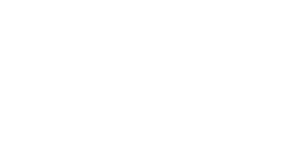

[(0.0, 1.0),
 Text(0.5, 0, 'ground truth period (d)'),
 Text(0, 0.5, 'percentage correctly identififed as rotators')]

In [28]:
%matplotlib notebook
fig, ax = plt.subplots(1)
ax.bar(testbins-2.5, percentage_correct, width=5, color='orange')
ax.set(ylim=(0,1), xlabel='ground truth period (d)', 
       ylabel='percentage correctly identififed as rotators')

In [29]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
# %matplotlib notebook

# fig, ax = plt.subplots(1)
# ax.scatter(p_r_t_test, ls_tess_a_test, c=predictions, s=10)
# ax.plot(range(-10,150),range(-10,150),'k-', lw=1)
# ax.set(xlim=(-5, 60), ylim=(-5,60),
#        xlabel='Santos 21 period (d)', ylabel='LS period (d)')

In [31]:
peri_pred = [p for (p, k) in zip(predictions, testing_set2['KIC'].values) if k in tst1['KIC'].values]
null_pred = [p for (p, k) in zip(predictions, testing_set2['KIC'].values) if k in tst2['KIC'].values]

In [32]:
peri_pred.count(1)/len(peri_pred)

0.33315227231577044

In [33]:
null_pred.count(1)/len(null_pred)

0.32558139534883723

In [34]:
residuals = ls_tess_a_test[p_r_t_test>0] / p_r_t_test[p_r_t_test>0]
residuals_yeah = ls_tess_a_test[(p_r_t_test>0)&(predictions==1)] / p_r_t_test[(p_r_t_test>0)&(predictions==1)]
residuals_nope = ls_tess_a_test[(p_r_t_test>0)&(predictions==0)] / p_r_t_test[(p_r_t_test>0)&(predictions==0)]

<IPython.core.display.Javascript object>


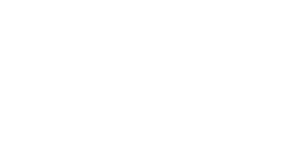

[(0.0, 20.0), Text(0.5, 0, 'residuals'), Text(0, 0.5, 'density')]

In [35]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(residuals_yeah, bins=np.arange(0,int(np.ceil(max(residuals_yeah))),0.5), log=True, density=False, color='#ffea00')
ax.hist(residuals_nope, bins=np.arange(0,int(np.ceil(max(residuals_nope))),0.5), log=True, density=False, color='#380057', alpha=0.5)
ax.set(xlim=(0,20), #ylim=(-5,60),
       xlabel='residuals', ylabel='density')

In [36]:
pred_yeah = ls_tess_a_test[(p_r_t_test>0)&(predictions==1)]
pred_nope = ls_tess_a_test[(p_r_t_test>0)&(predictions==0)]

<IPython.core.display.Javascript object>


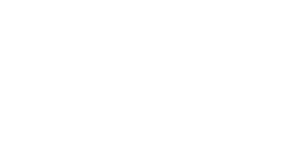

[(0.0, 40.0),
 Text(0.5, 0, 'LS TESS period: rotators (d)'),
 Text(0, 0.5, 'density')]

In [37]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(pred_yeah, bins=np.arange(0,int(np.ceil(max(pred_yeah))),0.5), log=False, 
        density=False, color='#ffea00')
ax.hist(pred_nope, bins=np.arange(0,int(np.ceil(max(pred_nope))),0.5), log=False, 
        density=False, color='#380057', alpha=0.5)
ax.set(xlim=(0,40), #ylim=(-5,60),
       xlabel='LS TESS period: rotators (d)', ylabel='density')

In [38]:
null_yeah = ls_tess_a_test[(p_r_t_test==0)&(predictions==1)]
null_nope = ls_tess_a_test[(p_r_t_test==0)&(predictions==0)]

<IPython.core.display.Javascript object>


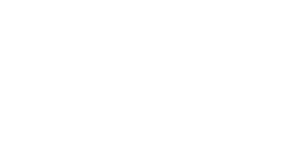

[(0.0, 25.0),
 Text(0.5, 0, 'LS TESS period: non-rotators (d)'),
 Text(0, 0.5, 'density')]

In [39]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(null_yeah, bins=np.arange(0,int(np.ceil(max(null_yeah))),0.5), log=False, 
        density=False, color='#ffea00')
ax.hist(null_nope, bins=np.arange(0,int(np.ceil(max(null_nope))),0.5), log=False, 
        density=False, color='#380057', alpha=0.5)
ax.set(xlim=(0,25), #ylim=(-5,60),
       xlabel='LS TESS period: non-rotators (d)', ylabel='density')

In [40]:
# top_ten = [(f, n) for _, f, n in sorted(zip(importances, test_features, test_feature_names), reverse=True)][-10:]
corner_features = [f for _, f in sorted(zip(importances, test_features), reverse=True)][:10]
corner_feature_names = [n for _, n in sorted(zip(importances, test_feature_names), reverse=True)][:10]

In [41]:
min(corner_features[9]), max(corner_features[9])

(0.0028075188519806, 0.3179967863926846)

In [42]:
# %matplotlib notebook

# fig = plt.figure(figsize=(15,15), constrained_layout=True)
# grid = gs.GridSpec(10,10, figure=fig)

# for i in range(10):
#     for j in range(10):
#         if i > j:
#             ax = fig.add_subplot(grid[i,j])
#             ax.scatter(corner_features[j], corner_features[i], c=predictions, s=2)
#             ax.set_xscale('log')
#             ax.set_yscale('log')
#             ax.tick_params(direction='in')
#             if i == 9:
#                 ax.set_xlabel(corner_feature_names[j], rotation=10)
#             if j == 0:
#                 ax.set_ylabel(corner_feature_names[i], rotation=80)

# fig.suptitle('all', x=0.09, y=0.95)

In [43]:
# %matplotlib notebook

# fig = plt.figure(figsize=(15,15), constrained_layout=True)
# grid = gs.GridSpec(10,10, figure=fig)

# for i in range(10):
#     for j in range(10):
#         if i > j:
#             ax = fig.add_subplot(grid[i,j])
#             ax.scatter(corner_features[j][p_r_t_test>0], corner_features[i][p_r_t_test>0], 
#                        c=predictions[p_r_t_test>0], s=2)
#             ax.set_xscale('log')
#             ax.set_yscale('log')
#             ax.tick_params(direction='in')
#             if i == 9:
#                 ax.set_xlabel(corner_feature_names[j], rotation=10)
#             if j == 0:
#                 ax.set_ylabel(corner_feature_names[i], rotation=80)

# fig.suptitle('S21 rotators', x=0.09, y=0.95)

In [44]:
# %matplotlib notebook

# fig = plt.figure(figsize=(15,15), constrained_layout=True)
# grid = gs.GridSpec(10,10, figure=fig)

# for i in range(10):
#     for j in range(10):
#         if i > j:
#             ax = fig.add_subplot(grid[i,j])
#             ax.scatter(corner_features[j][p_r_t_test==0], corner_features[i][p_r_t_test==0],
#                        c=predictions[p_r_t_test==0], s=2)
#             ax.set_xscale('log')
#             ax.set_yscale('log')
#             ax.tick_params(direction='in')
#             if i == 9:
#                 ax.set_xlabel(corner_feature_names[j], rotation=10)
#             if j == 0:
#                 ax.set_ylabel(corner_feature_names[i], rotation=80)

# fig.suptitle('S21 nonrotators', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


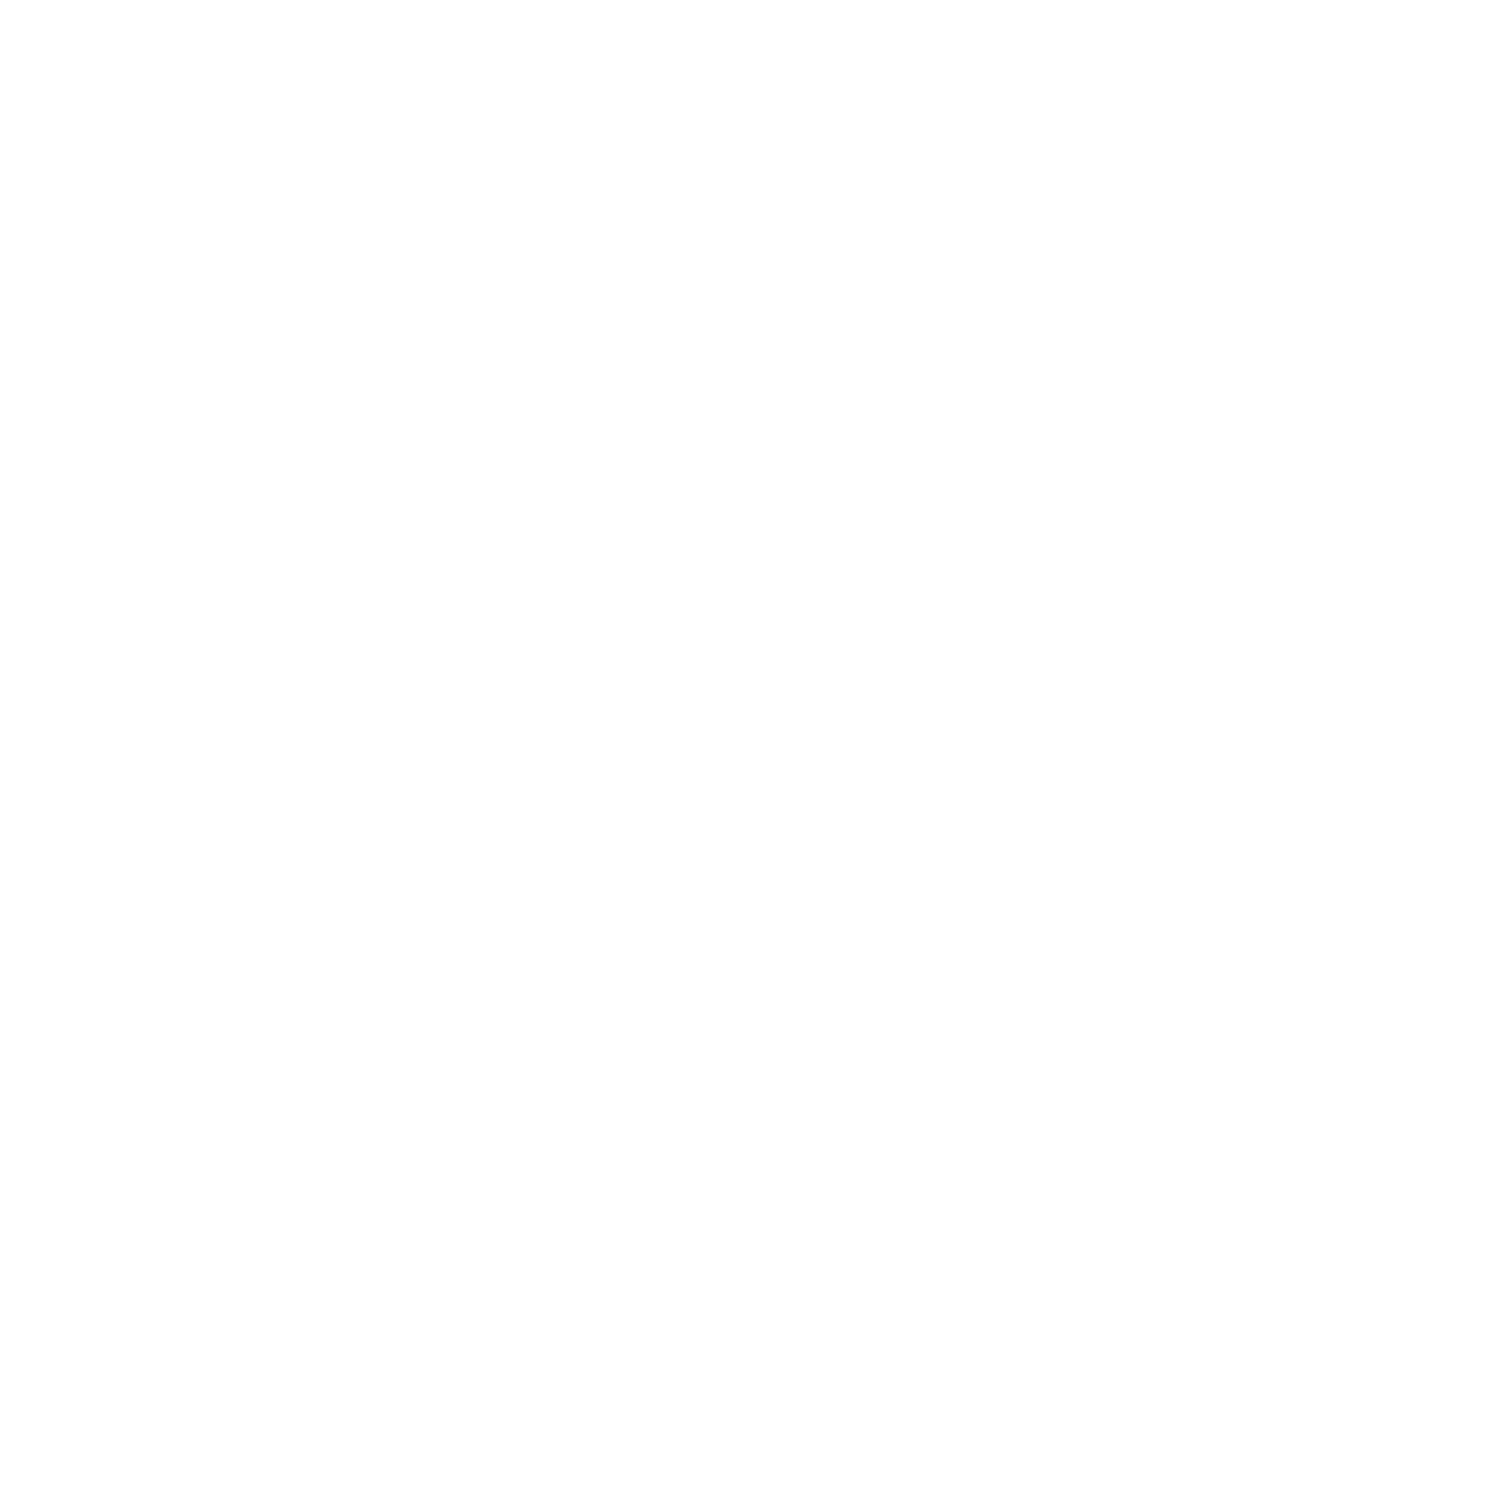

Text(0.09, 0.95, 'S21 rotators')

In [45]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15), constrained_layout=True)
grid = gs.GridSpec(10,10, figure=fig)

corner_features[5] = corner_features[5] * 10

for i in range(10):
    for j in range(10):
        if i > j:
            ax = fig.add_subplot(grid[i,j])
            try:
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test>0) & (predictions==0)],
                            y=corner_features[i][(p_r_t_test>0) & (predictions==0)],
#                                 fill=True, alpha=0.9,
                            color='#380057', log_scale=False)
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test>0) & (predictions==1)],
                            y=corner_features[i][(p_r_t_test>0) & (predictions==1)],
#                                 fill=True, alpha=0.7, 
                            color='#ffea00', log_scale=False)
            except:
                ax.scatter(corner_features[j][(p_r_t_test>0) & (predictions==0)],
                            corner_features[i][(p_r_t_test>0) & (predictions==0)],
                            s=2, color='#380057', alpha=0.9)
                ax.scatter(corner_features[j][(p_r_t_test>0) & (predictions==1)],
                            corner_features[i][(p_r_t_test>0) & (predictions==1)],
                            s=2, color='#ffea00', alpha=0.7)
#                 ax.set_xscale('log')
#                 ax.set_yscale('log')
            ax.tick_params(direction='in')
            if i == 9:
                ax.set_xlabel(corner_feature_names[j], rotation=10)
            if j == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)            
        elif i == j:
            ax = fig.add_subplot(grid[i,j])
            ax.hist(corner_features[j][(p_r_t_test>0) & (predictions==0)], log=False, density=False, color='#380057')#, bins=bins
            ax.hist(corner_features[j][(p_r_t_test>0) & (predictions==1)], log=False, density=False, color='#ffea00', alpha=0.5)
#             fig[f'{shorthand[j]}'].set_xscale('log')
            if i == 9:
                ax.set_xlabel(corner_feature_names[i], rotation=10)
            if i == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)


fig.suptitle('S21 rotators', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


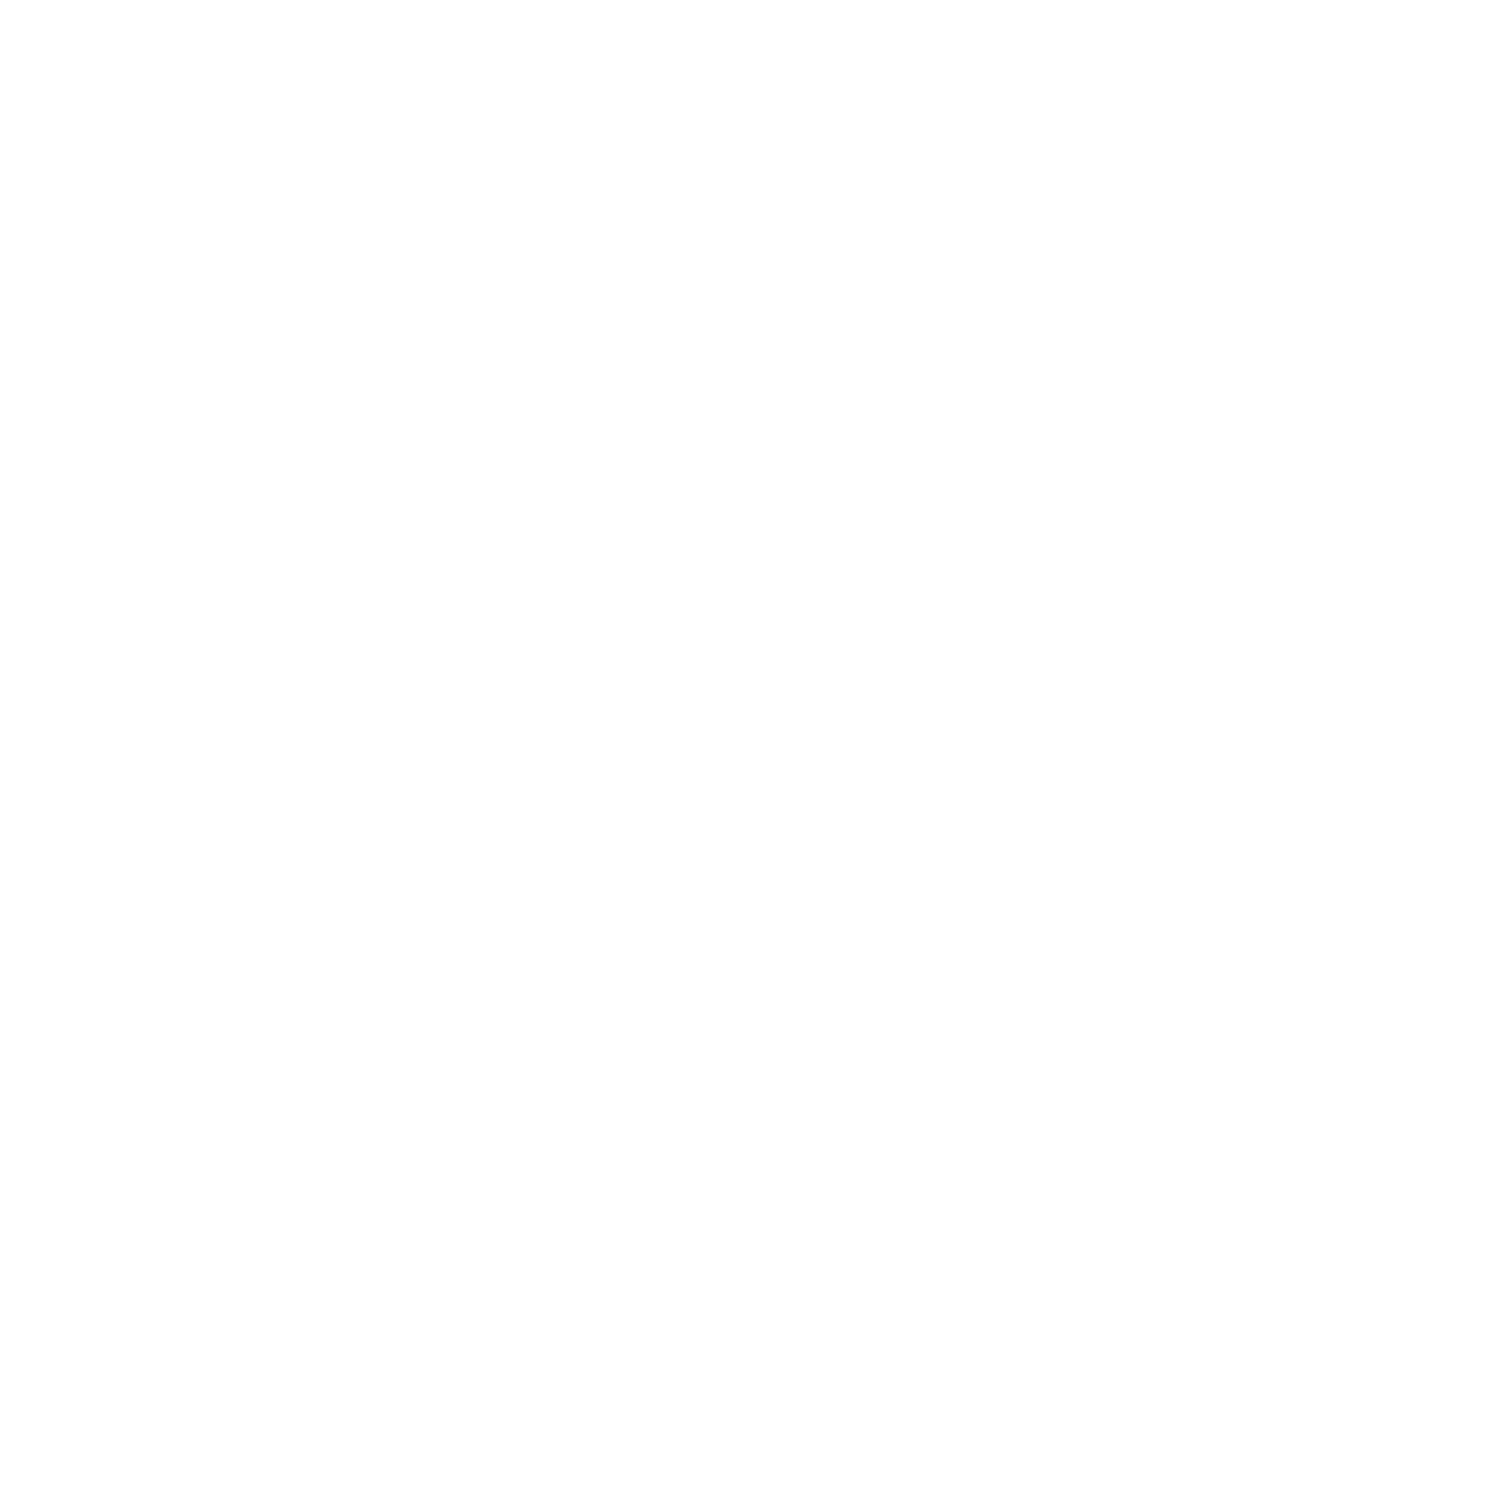

/home/isy/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/isy/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/isy/.local/lib/python3.10/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/isy/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/isy/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/isy/.local/lib/python3.10/site-packages/seabo

/home/isy/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/isy/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/isy/.local/lib/python3.10/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/isy/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/isy/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/isy/.local/lib/python3.10/site-packages/seabo

Text(0.09, 0.95, 'S21 nonrotators')

In [46]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15), constrained_layout=True)
grid = gs.GridSpec(10,10, figure=fig)

for i in range(10):
    for j in range(10):
        if i > j:
            ax = fig.add_subplot(grid[i,j])
            if corner_feature_names[i] == 'ACF Period 1st amplitude':
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==0) & (corner_features[i]>0)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==0) & (corner_features[i]>0)],
#                             fill=True, alpha=0.9, 
                            color='#380057', log_scale=True)
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==1) & (corner_features[i]>0)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==1) & (corner_features[i]>0)],
#                             fill=True, alpha=0.7, 
                            color='#ffea00', log_scale=True)
            elif corner_feature_names[j] == 'ACF Period 1st amplitude':
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==0) & (corner_features[j]>0)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==0) & (corner_features[j]>0)],
#                             fill=True, alpha=0.9, 
                            color='#380057', log_scale=True)
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==1) & (corner_features[j]>0)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==1) & (corner_features[j]>0)],
#                             fill=True, alpha=0.7,
                            color='#ffea00', log_scale=True)
            else:
                try:
                    sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==0)],
                                y=corner_features[i][(p_r_t_test==0) & (predictions==0)],
    #                             fill=True, alpha=0.9,
                                color='#380057', log_scale=True)
                    sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==1)],
                                y=corner_features[i][(p_r_t_test==0) & (predictions==1)],
    #                             fill=True, alpha=0.7, 
                                color='#ffea00', log_scale=True)
                except:
                    ax.scatter(corner_features[j][(p_r_t_test==0) & (predictions==0)],
                                corner_features[i][(p_r_t_test==0) & (predictions==0)],
                                s=2, color='#380057', alpha=0.9)
                    ax.scatter(corner_features[j][(p_r_t_test==0) & (predictions==1)],
                                corner_features[i][(p_r_t_test==0) & (predictions==1)],
                                s=2, color='#ffea00', alpha=0.7)
                    ax.set_xscale('log')
                    ax.set_yscale('log')
            ax.tick_params(direction='in')
            if i == 9:
                ax.set_xlabel(corner_feature_names[j], rotation=10)
            if j == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)

fig.suptitle('S21 nonrotators', x=0.09, y=0.95)

In [47]:
non_pred_yes = corner_features[(list(p_r_t_test.values)==0) & (list(predictions)==1)]
non_pred_no = corner_features[(list(p_r_t_test.values)==0) & (list(predictions)==0)]

# corner(non_pred_yes, non_pred_no)

# fig.suptitle('S21 nonrotators', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


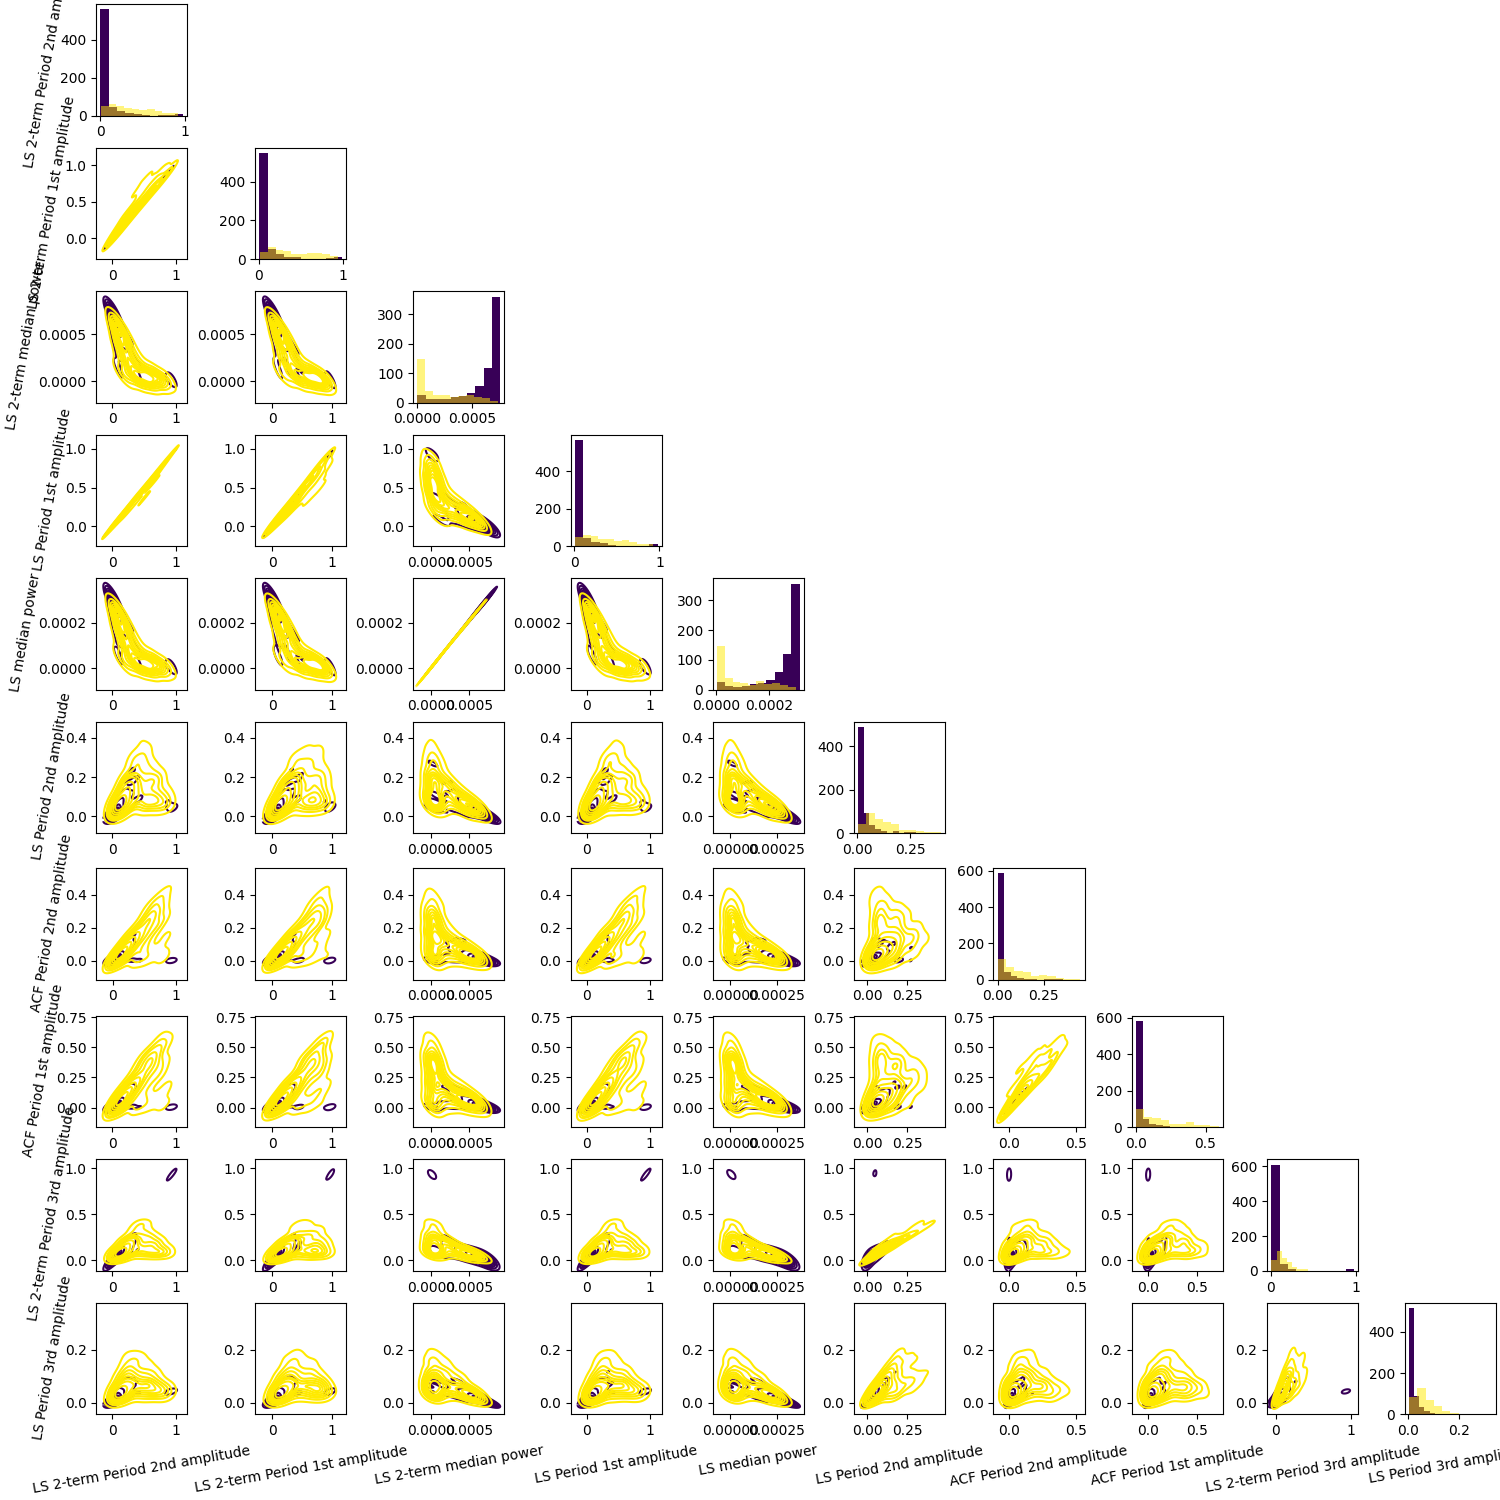

In [48]:
train_rot = tess_data[corner_feature_names][(p_r_t>0)][::100].values
train_nonrot = tess_data[corner_feature_names][(p_r_t==0)][::100].values

corner(train_rot, train_nonrot)

In [49]:
# tess_data[corner_feature_names][(p_r_t>0)][::100].values.shape
tess_data[corner_feature_names][(p_r_t>0)][::100].values[:,0].shape

(351,)

<IPython.core.display.Javascript object>


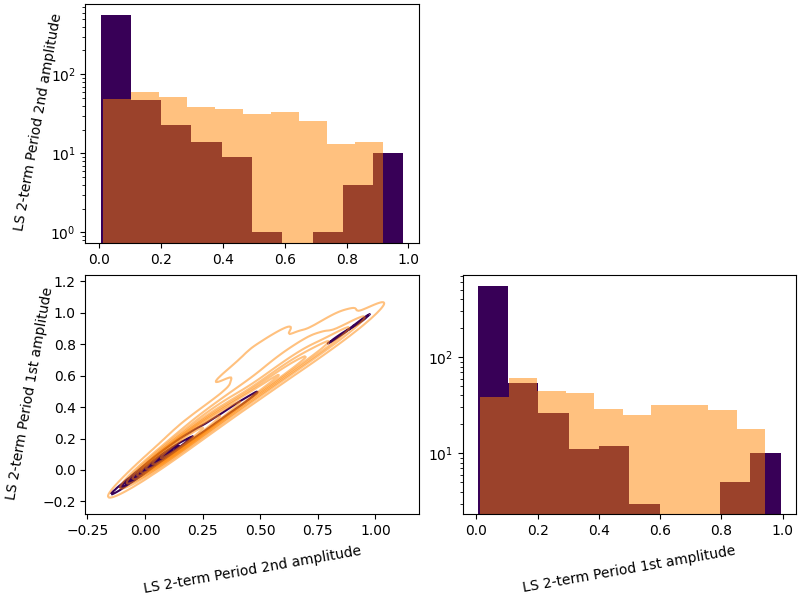

In [50]:
%matplotlib notebook
features = 2
rotators = tess_data[corner_feature_names][(p_r_t>0)][::100].values
nonrotators = tess_data[corner_feature_names][(p_r_t==0)][::100].values

shorthand = [f'f{i}' for i in range(features)]
mosaic = np.zeros((features,features), dtype='U12')
for i in range(features):
    for j in range(features):
        if i > j:
            mosaic[i,j] = f'{shorthand[j]}x{shorthand[i]}y'
        elif i == j:
            mosaic[i,j] = shorthand[i]
        else:
            mosaic[i,j] = '.'

fig = plt.figure(figsize=(8,6), constrained_layout=True).subplot_mosaic(mosaic)

for i in range(features):
    for j in range(features):
        if i > j:
            sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], x=nonrotators[:,j],
                        y=nonrotators[:,i],
#                             fill=True, alpha=0.9,
                        color='#380057', log_scale=False)
            sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], x=rotators[:,j],
                        y=rotators[:,i],
#                             fill=True, alpha=0.7, 
                        color='#ff8400', log_scale=False, alpha=0.5)
            if i == features-1:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(corner_feature_names[j], rotation=10)
            else:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(None)
            if j == 0:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(corner_feature_names[i], rotation=80)
            else:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(None)
#             if i == features-1:
#                 fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylim(ymax=0.03)
#                 if j == 7:
#                     fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlim(xmax=0.03)

        elif i == j:
            fig[f'{shorthand[j]}'].hist(nonrotators[:,j], log=True, density=False, color='#380057')#, bins=bins
            fig[f'{shorthand[j]}'].hist(rotators[:,j], log=True, density=False, color='#ff8400', alpha=0.5)
#             fig[f'{shorthand[j]}'].set_xscale('log')
            if i == features-1:
                fig[f'{shorthand[i]}'].set_xlabel(corner_feature_names[i], rotation=10)
            if i == 0:
                fig[f'{shorthand[i]}'].set_ylabel(corner_feature_names[i], rotation=80)
#                 if j == 

<IPython.core.display.Javascript object>


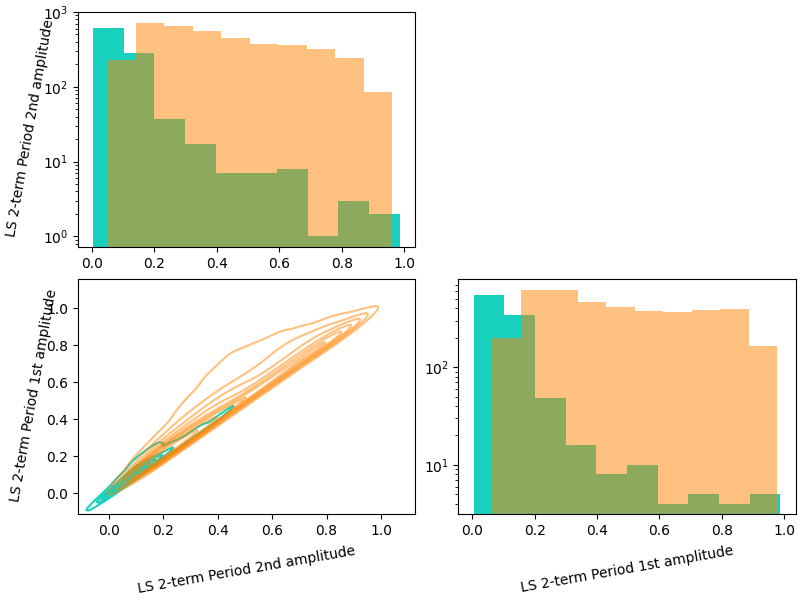

In [51]:
%matplotlib notebook
features = 2

shorthand = [f'f{i}' for i in range(features)]
mosaic = np.zeros((features,features), dtype='U12')
for i in range(features):
    for j in range(features):
        if i > j:
            mosaic[i,j] = f'{shorthand[j]}x{shorthand[i]}y'
        elif i == j:
            mosaic[i,j] = shorthand[i]
        else:
            mosaic[i,j] = '.'

fig = plt.figure(figsize=(8,6), constrained_layout=True).subplot_mosaic(mosaic)

for i in range(features):
    for j in range(features):
        if i > j:
            sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], 
                        x=corner_features[j][(p_r_t_test>0) & (predictions==0)],
                        y=corner_features[i][(p_r_t_test>0) & (predictions==0)],
#                                 fill=True, alpha=0.9,
                        color='#17d1be', log_scale=False)
            sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], 
                        x=corner_features[j][(p_r_t_test>0) & (predictions==1)],
                        y=corner_features[i][(p_r_t_test>0) & (predictions==1)],
#                                 fill=True, alpha=0.7, 
                        color='#ff8400', log_scale=False, alpha=0.5)
            if i == features-1:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(corner_feature_names[j], rotation=10)
            else:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(None)
            if j == 0:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(corner_feature_names[i], rotation=80)
            else:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(None)
#             if i == features-1:
#                 fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylim(ymax=0.03)
#                 if j == 7:
#                     fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlim(xmax=0.03)

        elif i == j:            
            fig[f'{shorthand[j]}'].hist(corner_features[j][(p_r_t_test>0) & (predictions==0)], 
                                        log=True, density=False, color='#17d1be')#, bins=bins
            fig[f'{shorthand[j]}'].hist(corner_features[j][(p_r_t_test>0) & (predictions==1)], 
                                        log=True, density=False, color='#ff8400', alpha=0.5)

#             fig[f'{shorthand[j]}'].set_xscale('log')
            if i == features-1:
                fig[f'{shorthand[i]}'].set_xlabel(corner_feature_names[i], rotation=10)
            if i == 0:
                fig[f'{shorthand[i]}'].set_ylabel(corner_feature_names[i], rotation=80)
#                 if j == 

<IPython.core.display.Javascript object>


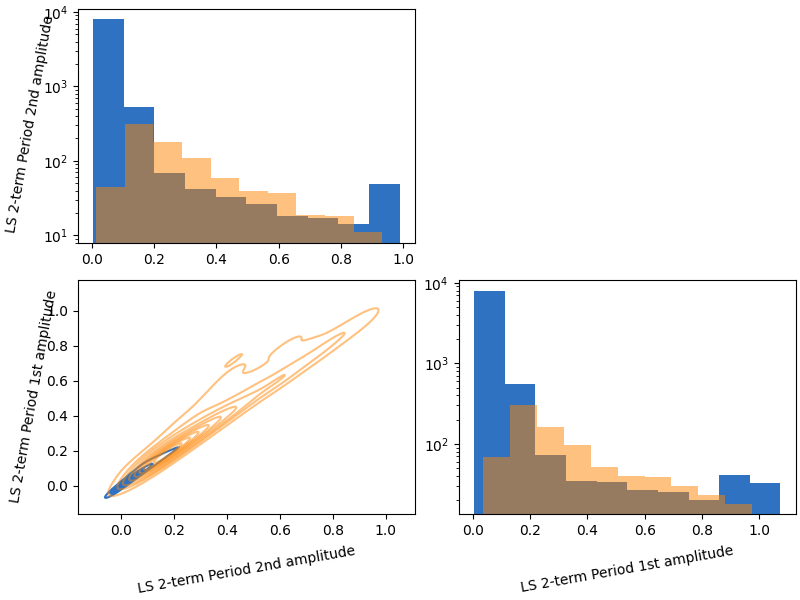

In [52]:
%matplotlib notebook
features = 2

shorthand = [f'f{i}' for i in range(features)]
mosaic = np.zeros((features,features), dtype='U12')
for i in range(features):
    for j in range(features):
        if i > j:
            mosaic[i,j] = f'{shorthand[j]}x{shorthand[i]}y'
        elif i == j:
            mosaic[i,j] = shorthand[i]
        else:
            mosaic[i,j] = '.'

fig = plt.figure(figsize=(8,6), constrained_layout=True).subplot_mosaic(mosaic)

for i in range(features):
    for j in range(features):
        if i > j:
            sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], 
                        x=corner_features[j][(p_r_t_test==0) & (predictions==0)],
                        y=corner_features[i][(p_r_t_test==0) & (predictions==0)],
#                                 fill=True, alpha=0.9,
                        color='#3072c2', log_scale=False)
            sns.kdeplot(ax=fig[f'{shorthand[j]}x{shorthand[i]}y'], 
                        x=corner_features[j][(p_r_t_test==0) & (predictions==1)],
                        y=corner_features[i][(p_r_t_test==0) & (predictions==1)],
#                                 fill=True, alpha=0.7, 
                        color='#ff8400', log_scale=False, alpha=0.5)
            if i == features-1:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(corner_feature_names[j], rotation=10)
            else:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlabel(None)
            if j == 0:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(corner_feature_names[i], rotation=80)
            else:
                fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylabel(None)
#             if i == features-1:
#                 fig[f'{shorthand[j]}x{shorthand[i]}y'].set_ylim(ymax=0.03)
#                 if j == 7:
#                     fig[f'{shorthand[j]}x{shorthand[i]}y'].set_xlim(xmax=0.03)

        elif i == j:            
            fig[f'{shorthand[j]}'].hist(corner_features[j][(p_r_t_test==0) & (predictions==0)], 
                                        log=True, density=False, color='#3072c2')#, bins=bins
            fig[f'{shorthand[j]}'].hist(corner_features[j][(p_r_t_test==0) & (predictions==1)], 
                                        log=True, density=False, color='#ff8400', alpha=0.5)

#             fig[f'{shorthand[j]}'].set_xscale('log')
            if i == features-1:
                fig[f'{shorthand[i]}'].set_xlabel(corner_feature_names[i], rotation=10)
            if i == 0:
                fig[f'{shorthand[i]}'].set_ylabel(corner_feature_names[i], rotation=80)
#                 if j == 